# Are African Americans at a Greater Risk of dying from Cardiovascular Disease than Caucasians?

Heart disease or(Cardiovascular Disease) is responsible for *800,000* deaths in the United States just in this past year. That comes out to one out of every three deaths, while more than **90Million** Americans are carrying a diagnosis of CVD. The most interesting statistic is that over 45% of Non-Hispanic Blacks live with CVD in the US. Let's take a closer look into this metric, by comparing the Heart Disease distribution rates of African Americans to the ones of Caucasians since they are the majority race. 

In [2]:

from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sb
%matplotlib inline

# import data sets
demo_path = glob('DEMOGRAPHICS.csv')
cause_path = glob('LEADINGCAUSESOFDEATH.csv')
factors_path = glob('RISKFACTORSANDACCESSTOCARE.csv')

# set data sets into pandas DataFrames
demo_df = pd.read_csv(demo_path[0]) 
cause_df = pd.read_csv(cause_path[0]) 
risk_df = pd.read_csv(factors_path[0])

### The Data
I worked with three different Data sets focusing on the Demograhics, Risk Factors, and the Leading Causes of Death in the United States. I have placed samples of each table below which seperate everything by State and by County. The "NaN" value represents the missing and or negative data points instead of replacing them with zero. Zero would of had an impact on the Measures of Central Tendency.

In [3]:
# selected the needed RISKFACTORS Dataset coumns
risk_col = ['CHSI_State_Name','CHSI_County_Name', 'Uninsured', 'Obesity']
risk_df = risk_df[risk_col]

#Removing negative indexes function
risk_numeric_columns = risk_df.select_dtypes(include=[pd.np.number]).columns
for c in risk_numeric_columns:
    risk_df.loc[risk_df[c] < 0, c] = float('nan')
    

print('Risk Factors')
risk_df.sample(5)

Risk Factors


,CHSI_State_Name,CHSI_County_Name,Uninsured,Obesity
1252,Michigan,Emmet,2857.0,NaN
3118,Wyoming,Albany,5182.0,16.4
2419,South Dakota,Todd,3053.0,36.4
1936,North Carolina,Iredell,14939.0,24.3
1834,New York,Chenango,6316.0,34.0


In [4]:
# Replacing Abbreviations 
cause_col_abbreviations = [column.replace('A_', 'Under 1').replace('B_', '1-14').replace('C_', '15-24') 
                               .replace('D_', '25-44').replace('E_', '45-64').replace('F_', '65+').replace
                               ('Wh_', 'White').replace('Bl_', 'Black').replace('Hi_', 'Hispanic')for column in cause_df.columns]
cause_df.columns = cause_col_abbreviations

# selected the LEADING CAUSES Dataset columns
cause_col = ['CHSI_State_Name','CHSI_County_Name', '25-44WhiteHeartDis',
             '25-44BlackHeartDis', '45-64WhiteHeartDis',
             '45-64BlackHeartDis', '65+WhiteHeartDis',
             '65+BlackHeartDis']
cause_df = cause_df[cause_col]

# Removing negative indexes function
cause_numeric_columns = cause_df.select_dtypes(include=[pd.np.number]).columns
for c in cause_numeric_columns:
    cause_df.loc[cause_df[c] < 0, c] = float('nan')
    
print('Leading Causes of Death')
cause_df.sample(5)

Leading Causes of Death


,CHSI_State_Name,CHSI_County_Name,25-44WhiteHeartDis,25-44BlackHeartDis,45-64WhiteHeartDis,45-64BlackHeartDis,65+WhiteHeartDis,65+BlackHeartDis
1021,Kentucky,Edmonson,25.0,NaN,31.0,NaN,29.0,NaN
1861,New York,Orange,12.0,22.0,22.0,24.0,35.0,35.0
1429,Mississippi,Jasper,12.0,32.0,31.0,29.0,41.0,42.0
1936,North Carolina,Iredell,12.0,NaN,22.0,23.0,33.0,32.0
125,Arkansas,Crawford,20.0,NaN,29.0,NaN,35.0,NaN


In [5]:
# DEMOGRAPHIC column Selection
demo_col = ['CHSI_County_Name','CHSI_State_Name','Population_Size','Poverty']
demo_df = demo_df[demo_col]

# Removing negative indexes function
demo_numeric_columns = demo_df.select_dtypes(include=[pd.np.number]).columns
for c in demo_numeric_columns:
    demo_df.loc[demo_df[c] < 0, c] = float('nan')
 

print('Demographics')
demo_df.sample(5)

Demographics


,CHSI_County_Name,CHSI_State_Name,Population_Size,Poverty
1812,Otero,New Mexico,63538.0,16.5
3096,Price,Wisconsin,15220.0,9.0
1198,Charles,Maryland,138822.0,6.9
2086,Logan,Ohio,46580.0,9.3
2935,Martinsville City,Virginia,14925.0,17.9


Here I merged all the data from the tables above into one master table.

In [6]:
# Selecting which columns to avg, sum, and group by 
cols_to_be_avg = ['Poverty','Obesity','25-44WhiteHeartDis',
             '25-44BlackHeartDis', '45-64WhiteHeartDis',
             '45-64BlackHeartDis', '65+WhiteHeartDis',
             '65+BlackHeartDis']
cols_to_be_sum = ['Population_Size', 'Uninsured']

# Concatination of Columns
cause_risk_df = cause_df.merge(risk_df, on = ['CHSI_State_Name', 'CHSI_County_Name'], how = 'outer')
main_df = cause_risk_df.merge(demo_df, on = ['CHSI_State_Name', 'CHSI_County_Name'], how = 'outer')
main_df.sample(5)

,CHSI_State_Name,CHSI_County_Name,25-44WhiteHeartDis,25-44BlackHeartDis,45-64WhiteHeartDis,45-64BlackHeartDis,65+WhiteHeartDis,65+BlackHeartDis,Uninsured,Obesity,Population_Size,Poverty
1023,Kentucky,Estill,10.0,NaN,32.0,NaN,38.0,NaN,2367.0,NaN,15089.0,21.1
702,Indiana,Carroll,NaN,NaN,28.0,NaN,30.0,NaN,2196.0,32.6,20426.0,7.5
2900,Virginia,Smyth,13.0,NaN,31.0,NaN,32.0,36.0,3865.0,22.8,32640.0,14.8
2807,Vermont,Chittenden,12.0,NaN,21.0,NaN,29.0,NaN,10177.0,15.8,149613.0,7.6
478,Georgia,McDuffie,19.0,10.0,22.0,28.0,29.0,30.0,3546.0,24.2,21743.0,17.5


In [7]:
wht_young = main_df['25-44WhiteHeartDis']
wht_mid = main_df['45-64WhiteHeartDis']
wht_old = main_df['65+WhiteHeartDis']
blk_young = main_df['25-44BlackHeartDis']
blk_mid = main_df['45-64BlackHeartDis']
blk_old = main_df['65+BlackHeartDis']

all_wht = wht_young + wht_mid + wht_old
all_blk = blk_young + blk_mid + blk_old

### How do we break down this data set into groups for better visualization?

Using the Density Plots below you can see the distribution over one year between all CVD cases broken into two groups. The first one is by "Race" and the second by three age subgroups ranging from 25 to 65+. The reason behind using denisity plots is because there is vast majority in the Population Size between Caucasians and African Americans, making Non-Hispanic Whites 61.9% of the total population.

####  Group 1 - By Race

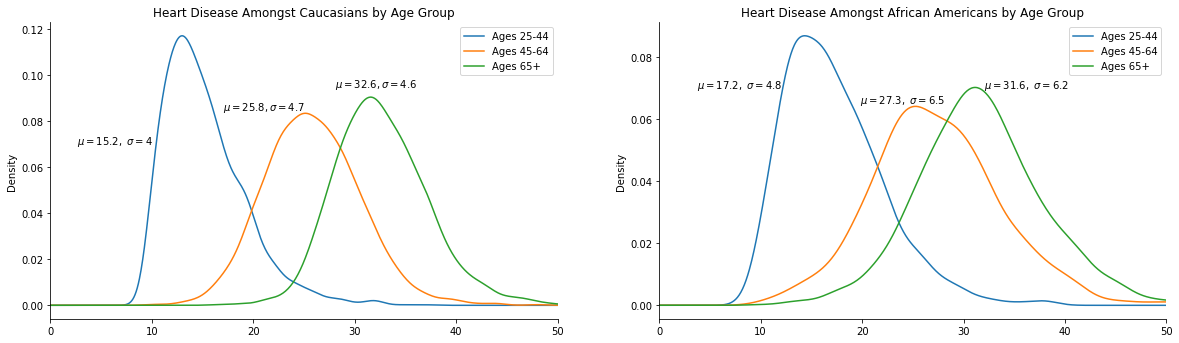

In [8]:
# PLOTS FOR WHITE ONLY ALL AGES
plt.figure(figsize=(20,12))
plt.subplot(221)
wht_young.plot.kde(label='Ages 25-44')
wht_mid.plot.kde(label='Ages 45-64')
wht_old.plot.kde(label='Ages 65+')
plt.legend()
plt.xlim([0 , 50])
plt.text(2.6, .070, r'$\mu=15.2,\ \sigma=4$')
plt.text(17, .085, r'$\mu=25.8, \sigma=4.7$')
plt.text(28, .095, r'$\mu=32.6, \sigma=4.6$')
plt.title('Heart Disease Amongst Caucasians by Age Group')
sb.despine()

# PLOTS OF BLACKS ONLY  ALL AGES
plt.subplot(222)
blk_young.plot.kde(label='Ages 25-44')
blk_mid.plot.kde(label='Ages 45-64')
blk_old.plot.kde(label='Ages 65+')
plt.text(3.7, .070, r'$\mu=17.2,\ \sigma=4.8$')
plt.text(19.8, .065, r'$\mu=27.3,\ \sigma=6.5$')
plt.text(32, .070, r'$\mu=31.6,\ \sigma=6.2$')
plt.legend()
plt.xlim([0 , 50])
plt.title('Heart Disease Amongst African Americans by Age Group')
sb.despine()

The 25-44 age group seems to have the highest density as the 45-64 age group has the widest spread. The lowest Density level of Caucasians is .08 which is the highest level of the African Americans.  Let's investigate into these numbers by looking into the group 2 results.

#### Group 2 - Age Group

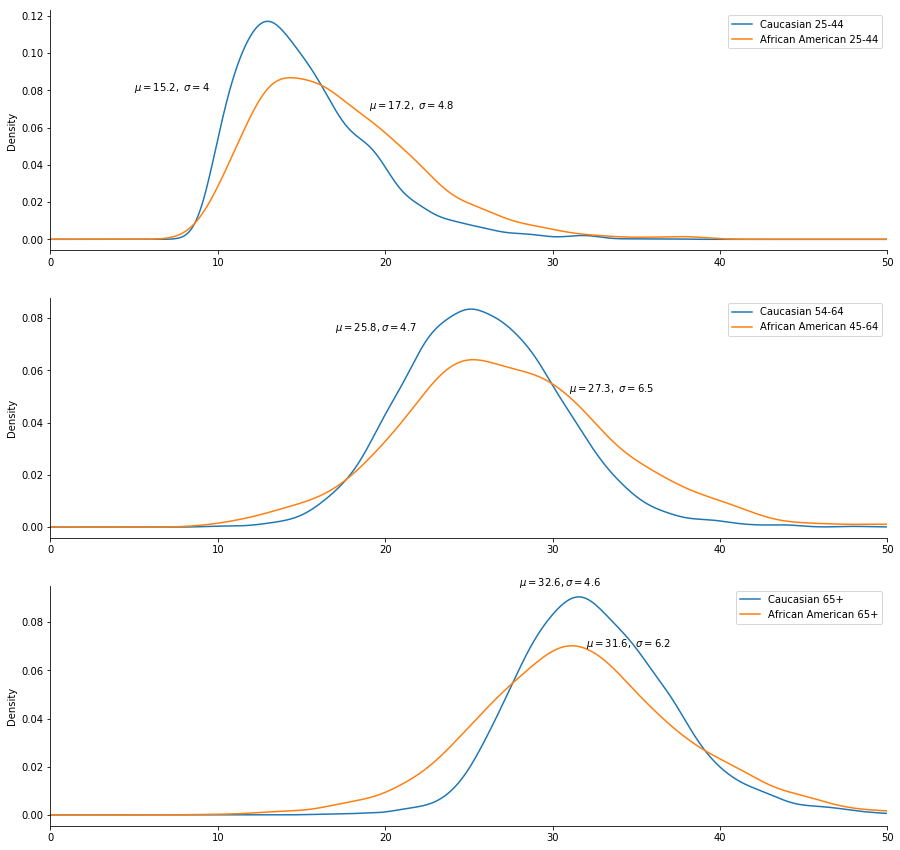

In [21]:
# MIX RACE PER AGE GROUP
plt.figure(figsize=(15,15))
plt.subplot(311)
wht_young.plot.kde(label='Caucasian 25-44')
plt.text(5, .080, r'$\mu=15.2,\ \sigma=4$')
blk_young.plot.kde(label='African American 25-44')
plt.text(19, .070, r'$\mu=17.2,\ \sigma=4.8$')
plt.legend()
plt.xlim([0 , 50])
sb.despine()

plt.subplot(312)
wht_mid.plot.kde(label='Caucasian 54-64')
plt.text(17, .075, r'$\mu=25.8, \sigma=4.7$')
blk_mid.plot.kde(label='African American 45-64')
plt.text(31, .052, r'$\mu=27.3,\ \sigma=6.5$')
plt.legend()
plt.xlim([0 , 50])
sb.despine()

plt.subplot(313)
wht_old.plot.kde(label='Caucasian 65+')
plt.text(28, .095, r'$\mu=32.6, \sigma=4.6$')
blk_old.plot.kde(label='African American 65+')
plt.text(32, .070, r'$\mu=31.6,\ \sigma=6.2$')
plt.legend()
plt.xlim([0 , 50])
sb.despine()

### Key Insights
#### 1. African Americans have a Higher Average & Standard Deviation
The means seem to increase steadily in both races however, the African Americans have a higher mean in the 25-44 and 45-65 age groups than the Caucasians. They also have a higher Standard Deviation which correlates to their wider distribution shown throughout the plots in all the age groups. Blacks make up 12% of the US population(37million) and according to the [Henry J Kaiser Family Foundation]([https://www.kff.org/disparities-policy/fact-sheet/health-coverage-for-the-black-population-today-and-under-the-affordable-care-act/]) 21% under the age of 65 are uninsured, versus 13% of Whites who make up more than 60% of the population. Less access to health care means less diagnosis therefore a wider spread across all age groups. 

#### 2. Caucasians have a higher average in the 65+ age group
Caucasians have a higher mean in the 65+ age group because they have a higher life expectancy. According to [Business Insider]([http://www.businessinsider.com/huge-racial-gap-in-life-expectancy-2014-1?IR=T]) the average life expectancy of African Americans in the United States is 75. That’s the same as the average life expectancy of white men and women in 1979. Currently the average life expectancy of Caucasians is around 79. Since Whites live longer it actually increases their chances of being diagnosed with CVD in this age group.

### Is The Difference Between Whites & Blacks Significant?

To determine if the differences between the two races are indeed statistically significant I performed a series of tests with the results listed below

In [10]:
print(ttest_ind(all_blk.dropna(),all_wht.dropna(), equal_var=False))

Ttest_indResult(statistic=5.1360102452841545, pvalue=3.3240117649303344e-07)


As we can see there is a difference between these two variables however, the question remains as to why? Additional variables must be taken into consideration especially in the lower income communities with obesity being a major factor. Obesity is amongst the leading causes of CVD and poor social economic classes are the most effected by it. Unfortunately, the majority of African Americans happen to be in the lower income class with their median household income being $30,000 less than the Whites.  




### Is There a Correlation Between Poverty & Obesity? 

Below is the Correlation result between these Variables

Poverty & Obesity = 0.4149 although it is not substantial there is still 
 a positive correlation and we can see the evidence in the scatter plot bellow


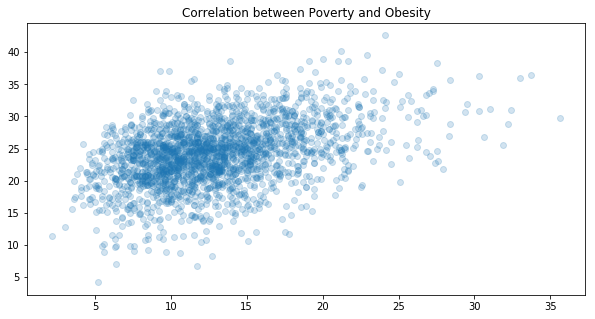

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(main_df.Poverty,main_df.Obesity, alpha=0.2)
plt.title('Correlation between Poverty and Obesity')

# main_df_df.Poverty.corr(main_df.Obesity) to get correlation number.
print('Poverty & Obesity = '"%.4f" %0.4148590423831601,
      'although it is not substantial there is still \n a positive correlation and we can see the evidence in the scatter plot bellow') 

### Conclusion
We must increase our efforts on employing and educating people in low income areas. Increasing the employment rates, will result in better nutrition since organic produce costs are at the minimum 20% more expensive. Improved nutrition means less cases of obesity and lowering the obesity percentages will decrease the number of deaths from CVD(lowering the African American mean).  Full time Employment will also decrease the number of the uninsured population which will narrow the African American distribution in the plots above. By educating and employing people from these areas we don’t just provide the chance of better health care, we provide the chance to improve the quality of their life.  